# Inteferences using Fresnel biprism

A classical experiment in Optics is the interference process by a Fresnel biprism. In order to obtain a interference, a monocromatic light beam needs to be divided into two coherent waves and join them again. This can be performed using a Fresnel biprism.

To analyze the inteference process, we have used the XY and XZ framework.

## XY formalism

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=(5,5)
rcParams['figure.dpi']=125

In the first place, we create a plane wave and mask it with a circular aperture.


In [3]:
x0 = np.linspace(-.2*mm,.2*mm,1024)
y0 =  np.linspace(-.2*mm,.2*mm,1024)
wavelength = 0.6238 * um

In [4]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=(.2*mm,.2*mm))


After that, we generate a Fresnel Biprism mask. The field just after the Fresnel biprism is just the multiplication of the field by the two masks.

In [5]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), width=.2*mm, height=5 * um, n=1.5)

u1 = t0 * t1 * u0 

Then, we create a function in order to draw the intensity distribution at a distance z after the mask.

In [6]:
def difraccion_biprism_Fresnel(u1, z_mask):
    """Computes and draws the intensity distribution of a light beam after a mask.
    
    Parameters:
    u1 (Scalar_field_XY): Field just after the mask.
    z_mask (float): Distance from the mask."""

    if z_mask>0:
        u2 = u1.RS(z=z_mask, new_field=True)
    else:
        u2 = u1
        
    u2.draw(kind='intensity')
    plt.title("$z={:2.2f}\,um$".format(z_mask), fontsize=24)

Now, let us show what is the light field just after the grating

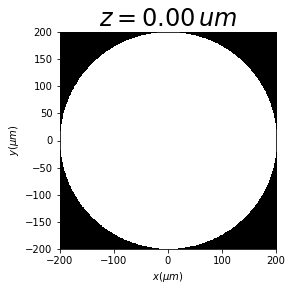

In [7]:
difraccion_biprism_Fresnel(u1, z_mask=0*mm)

And now, at different increasing distances:

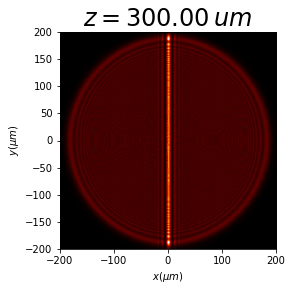

In [8]:
difraccion_biprism_Fresnel(u1,z_mask=.3*mm)

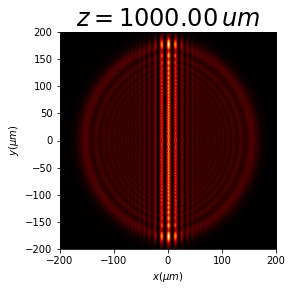

In [9]:
difraccion_biprism_Fresnel(u1,z_mask=1*mm)

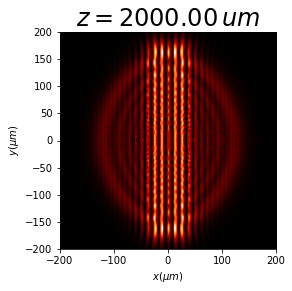

In [10]:
difraccion_biprism_Fresnel(u1,z_mask=2*mm)

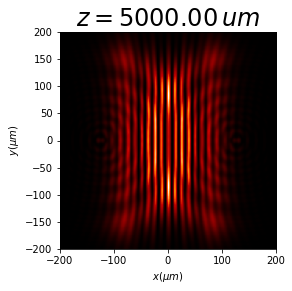

In [11]:
difraccion_biprism_Fresnel(u1,z_mask=5*mm)

Nevertheless, after a certain distance, the light from both biprism separates and interferences is not produced:

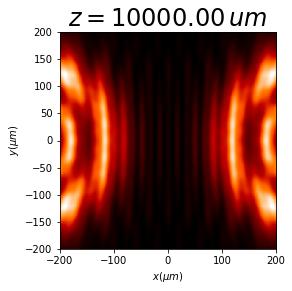

In [12]:
difraccion_biprism_Fresnel(u1,z_mask=10*mm)

We can see that fringes appear while the two beams, produced by it face of the Fresnel briprism, coincides in space.

## XZ formalism

Now, let us show the same case for XZ formalism. In this case, we can see how light is modified by the briprism, as no Thin Element Approximation is necessary.

In [13]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [14]:
num_x = 1024*4
num_z = 1024*2
x0 = np.linspace(-75, 75, num_x)
z0_near = np.linspace(0*um, 25*um, num_z)
z0_all = np.linspace(0*um, 1000*um, num_z)

wavelength = 0.6238 * um


In [15]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave()


In [16]:
t0 = Scalar_mask_XZ(x=x0, z=z0_near, wavelength=wavelength)
t0.biprism(r0=(0*um, 5*um), length=100*um, height=5*um, refraction_index=1.5, angle=0*degrees)
t0.incident_field(u0)


In [17]:
t0.WPM(verbose=True)

Time = 3.73 s, time/loop = 1.821 ms


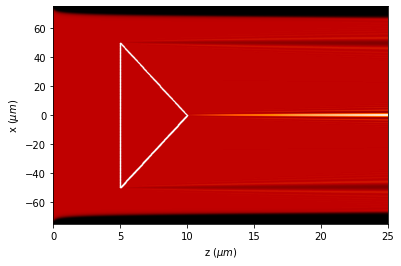

In [18]:
t0.draw(kind='intensity', draw_borders=True)

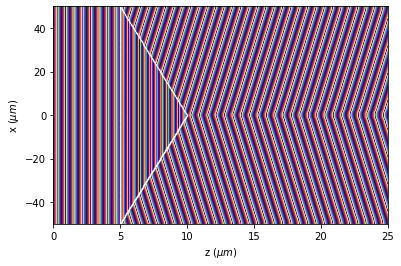

In [19]:
t0.draw(kind='phase', draw_borders=True)
plt.xlim(0,25)
plt.ylim(-50,50);

In [20]:
u_far = Scalar_mask_XZ(x=x0, z=z0_all, wavelength=wavelength)
u_far.biprism(r0=(0*um, 5*um), length=100*um, height=5*um, refraction_index=1.5, angle=0*degrees)
u_far.incident_field(u0)


In [21]:
u_far.WPM(verbose=True)

Time = 2.56 s, time/loop = 1.25 ms


(-50.0, 50.0)

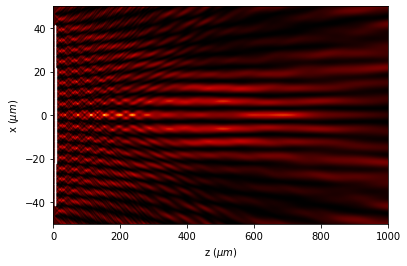

In [22]:
u_far.draw(kind='intensity', draw_borders=True)
plt.ylim(-50*um, 50*um)

(-50.0, 50.0)

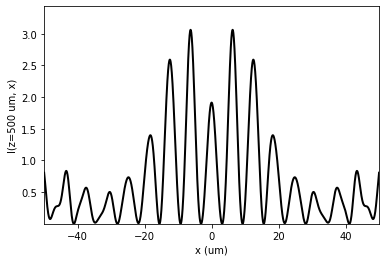

In [23]:
u_field_last_plane=u_far.profile_transversal(z0=500*um)
plt.xlim(-50*um, 50*um)

Here, we see the intensity distribution at z=500$\mu$m, showing the interference process.

## Polarization

In [24]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY


In [25]:
x0 = np.linspace(-.2*mm,.2*mm,1024)
y0 =  np.linspace(-.2*mm,.2*mm,1024)
wavelength = 0.6238 * um


In [26]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.plane_wave(A=1)

In [27]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_wave(u0,v=[1/np.sqrt(2), 1/np.sqrt(2)])

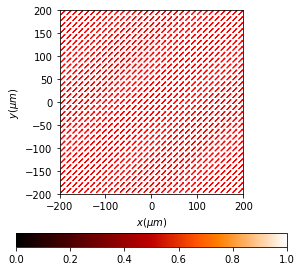

In [28]:
EM0.__draw_ellipses__(num_ellipses=(31,31), amplification=.75, color_line='r', head_width=2,
                     logarithm=False, normalize=True, cut_value='')

In [29]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=(200 * um, 200 * um))

In [30]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), width=200 * um, height=5 * um, n=1.5)

u1 = t0 * t1

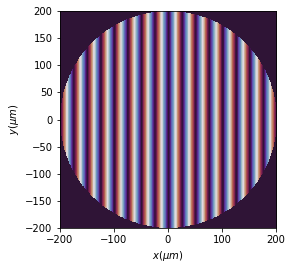

In [31]:
u1.draw(kind='phase');

<Figure size 432x288 with 0 Axes>

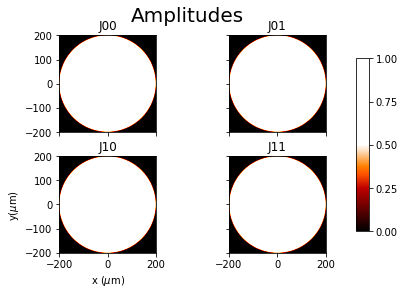

In [32]:
EM1 = Vector_mask_XY(x0, y0, wavelength)
EM1.polarizer_linear(azimuth=45*degrees)
EM1.apply_scalar_mask(u1)
EM1.draw()

In [33]:
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.two_levels(level1=0, level2=1)

<Figure size 432x288 with 0 Axes>

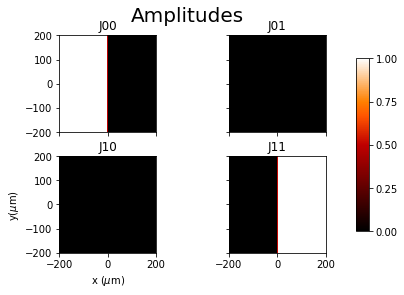

In [34]:
EM2 = Vector_mask_XY(x0, y0, wavelength)
EM2.complementary_masks(t2, state_0=np.array([[1, 0], [0, 0]]), state_1=np.array([[0, 0],  [0, 1]]))
EM2.draw();

In [35]:
EM3=EM0*EM1*EM2

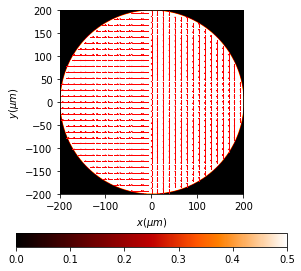

In [36]:
EM3.draw('ellipses', num_ellipses=(31,31), color_line='r', amplification=0.75, head_width=1);

In [38]:
EM4=EM3.VRS(z=4*mm)

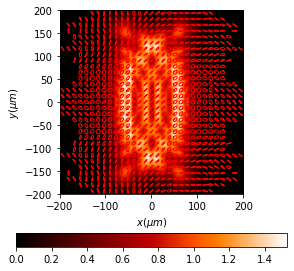

In [39]:
EM4.__draw_ellipses__(num_ellipses=(31,31), color_line='r', amplification=0.75, head_width=1);